In [1]:
import pandas as pd
import numpy as np

# setting display format so that large values are shown properly
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Constants

In [2]:
fund_range_min = 5000000
fund_range_max = 15000000

funding_types = ['angel', 'venture', 'seed', 'private_equity']

# Checkpoint 1: Data Cleaning 1

In [3]:
companies = pd.read_csv('companies.txt', sep='\t', encoding='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv', sep=',', encoding='iso-8859-1')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Serious-Business,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000


In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
rounds2.describe()

,raised_amount_usd
count,94959.0000
mean,10426869.3345
std,114821247.9849
min,0.0000
25%,322500.0000
50%,1680511.0000
75%,7000000.0000
max,21271935000.0000


In [10]:
# Converting permalink to lower case to avoid future join on permalink
companies['permalink'] = companies['permalink'].str.lower()
# Number of unique companies in "companies.txt"
companies.permalink.nunique()

66368

In [11]:
# Converting company_permalink to lower case to avoid future join on company_permalink
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
# Number of unique companies in "rounds2.csv"
rounds2.company_permalink.nunique()

66370

In [12]:
# Checking round2['company_permalink'] in company['permalink']
# reference https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

is_in_companies = rounds2['company_permalink'].isin(companies['permalink'])
rounds2[~is_in_companies]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0000
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


Looks like there is some encoding issue while reading the data

In [13]:
companies = pd.read_csv('companies.txt', sep='\t', encoding='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv', sep=',', encoding='iso-8859-1')

In [14]:
# Again reading the columns with proper encoding as suggested in the discussion forum
companies['permalink'] = companies['permalink'].str.encode("utf-8").str.decode(
    'ASCII', 'ignore').str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode(
    "utf-8").str.decode('ASCII', 'ignore').str.lower()

is_in_companies = rounds2['company_permalink'].isin(companies['permalink'])
print(rounds2[~is_in_companies])
print()
# Unique companies 
print(companies['permalink'].nunique())

# Unique companies 
print(rounds2['company_permalink'].nunique())

Empty DataFrame
Columns: [company_permalink, funding_round_permalink, funding_round_type, funding_round_code, funded_at, raised_amount_usd]
Index: []

66368
66368


As we can see that there is no company in the **rounds2** which is not there in **companies**

In [15]:
# Merging rounds2 with companies on permalink
master_frame = rounds2.merge(companies,
                             how="inner",
                             left_on="company_permalink",
                             right_on="permalink")

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [17]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0000,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,nan,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0000,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


Now we are cleaning data based on techniques learned in the course https://learn.upgrad.com/v/course/498/session/44768/segment/244281

In [18]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [19]:
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [20]:
# column wise summing up the missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0000
funding_round_permalink    0.0000
funding_round_type         0.0000
funding_round_code        72.9100
funded_at                  0.0000
raised_amount_usd         17.3900
permalink                  0.0000
name                       0.0000
homepage_url               5.3400
category_list              2.9700
status                     0.0000
country_code               7.5500
state_code                 9.5200
region                     8.8400
city                       8.8400
founded_at                17.8500
dtype: float64

In [21]:
# dropping not useful columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [22]:
# column wise summing up the missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.0000
funding_round_permalink    0.0000
funding_round_type         0.0000
funded_at                  0.0000
raised_amount_usd         17.3900
permalink                  0.0000
name                       0.0000
category_list              2.9700
status                     0.0000
country_code               7.5500
dtype: float64

In [23]:
# We can remove the rows where `category_list`, `country_code` is null as we have enough data
master_frame=master_frame[~master_frame['category_list'].isnull()]
master_frame=master_frame[~master_frame['country_code'].isnull()]
master_frame=master_frame[~master_frame['raised_amount_usd'].isnull()]
# column wise summing up the missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink         0.0000
funding_round_permalink   0.0000
funding_round_type        0.0000
funded_at                 0.0000
raised_amount_usd         0.0000
permalink                 0.0000
name                      0.0000
category_list             0.0000
status                    0.0000
country_code              0.0000
dtype: float64

In [24]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 10 columns):
company_permalink          88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
dtypes: float64(1), object(9)
memory usage: 7.4+ MB


In [25]:
mapping = pd.read_csv('mapping.csv', sep=',', encoding='iso-8859-1')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [26]:
# Removing the rows where `category_list` is null as it will not be mapped to category
mapping = mapping[~mapping['category_list'].isnull()]
mapping = mapping.drop('Blanks', axis=1)

In [27]:
# Replacing 0 in the `category_list` like `Fleet Ma0gement` but ignoring Entriprise 2.0
mapping['category_list'] = mapping['category_list'].str.lower().str.replace('0','na').str.replace('\.na','.0')

# Checking the date if a cetegory maps to multiple sectors.
# However, that is not the case thus we can proceed with our mapping data exercise
mapping[(mapping == 1).sum(axis=1) > 1].head()


print(mapping.to_string())


                             category_list  Automotive & Sports  Cleantech / Semiconductors  Entertainment  Health  Manufacturing  News, Search and Messaging  Others  Social, Finance, Analytics, Advertising
1                                       3d                    0                           0              0       0              1                           0       0                                        0
2                              3d printing                    0                           0              0       0              1                           0       0                                        0
3                            3d technology                    0                           0              0       0              1                           0       0                                        0
4                               accounting                    0                           0              0       0              0                           0       0       

# Checkpoint 2: Funding Type Analysis

**As we can see that all the rows have all the columns and now our data is clean**

In [28]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0000,/organization/-fame,#fame,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0000,/organization/01games-technology,01Games Technology,Games,operating,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0000,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN


In [29]:
# Let us convert `funding_round_type` as category so that we can get the count of each type of funding
master_frame['funding_round_type'] = master_frame['funding_round_type'].astype('category')

# Count of each type of funding type
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [30]:
master_frame['raised_amount_usd'].describe()

count         88529.0000
mean       10473849.7223
std       111811808.0009
min               0.0000
25%          370518.0000
50%         1800000.0000
75%         7100000.0000
max     21271935000.0000
Name: raised_amount_usd, dtype: float64

In [31]:
master_frame_grouped = master_frame.groupby('funding_round_type')
master_frame_grouped.first()

,company_permalink,funding_round_permalink,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
funding_round_type,,,,,,,,,
angel,/organization/10seconds-software,/funding-round/dacf342722793cb7485fbdbd7530461d,01-07-2010,100000.0000,/organization/10seconds-software,10seconds Software,Enterprise Software|Mobility|Software,operating,AUS
convertible_note,/organization/1-800-doctors,/funding-round/9eb8c7790a0c200d79e75785d1c4aa12,02-03-2011,1750000.0000,/organization/1-800-doctors,1-800-DOCTORS,Health and Wellness,operating,USA
debt_financing,/organization/10-20-media,/funding-round/436874dc54b54460f99f44c06e50990a,11-01-2011,800000.0000,/organization/10-20-media,10-20 Media,E-Commerce,operating,USA
equity_crowdfunding,/organization/1rebel,/funding-round/a5c7a437af6e065280be325ae194f8d6,01-09-2014,2572969.0000,/organization/1rebel,1Rebel,Fitness,operating,GBR
grant,/organization/121cast,/funding-round/d23f44687b25b1b1aa30a38cb79a4edb,01-05-2012,20000.0000,/organization/121cast,121cast,Audio|Mobile|Music,operating,AUS
non_equity_assistance,/organization/ancatt,/funding-round/077c8de638dcede183ae73082d9a1f90,01-06-2015,30000.0000,/organization/ancatt,AnCatt,Energy Efficiency|Manufacturing|Sustainability,operating,USA
post_ipo_debt,/organization/3d-systems,/funding-round/bdafdb1b27266967e857f9b2cd15cfa6,13-10-2014,150000000.0000,/organization/3d-systems,3D Systems,Software,ipo,USA
post_ipo_equity,/organization/21vianet,/funding-round/5b69fb58b6b3cca0dd4fa11644bb57d0,01-10-2013,100000000.0000,/organization/21vianet,21viaNet,Software|Web Hosting,ipo,CHN
private_equity,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,01-02-2015,6000000.0000,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA


***Creating a map for mean (average) for each funding type***

In [32]:
funding_map = {x: round(master_frame_grouped.get_group(x)['raised_amount_usd'].mean(), 2) for x in funding_types}
funding_map

{'angel': 971573.89,
 'venture': 11724222.69,
 'seed': 747793.68,
 'private_equity': 73938486.28}

***Filtering fundings which are in the range of Sparks Fund Portfolio***

In [33]:
suggested_funding_type = [
    key for (key, value) in funding_map.items()
    if value >= fund_range_min and value <= fund_range_max
]

suggested_funding_type

['venture']

### As we can see, only ***venture*** type funding fits in the Sparks Fund Portfolio

# Checkpoint 3: Country Analysis

Fetching countries with English as Official Language. I am considering **Countries where English is a de facto official language** and **Countries where English is a de jure and de facto official language**. Reference https://stackoverflow.com/questions/50633050/scrape-tables-into-dataframe-with-beautifulsoup

In [34]:
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language'
page = requests.get(URL)

In [35]:
soup = BeautifulSoup(page.content, "lxml")
tables = soup.find_all('table')[0:2]
table_rows_per_tables = [table.find_all('tr') for table in tables]
table_rows = [row for rows in table_rows_per_tables for row in rows]
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

countries = pd.DataFrame(
    res,
    columns=["Index", "Country", "Code", "Region", "Population", "Primary"])
countries = countries.drop('Index', axis=1)
countries = countries.drop('Region', axis=1)
countries = countries.drop('Population', axis=1)
countries = countries.drop('Primary', axis=1)
countries.head(5)

,Country,Code
0,Australia,AUS
1,New Zealand[1],NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda[2],ATG


In [36]:
master_frame_country_grouped = master_frame.loc[
    master_frame['funding_round_type'] == 'venture'].groupby('country_code')

In [37]:
top9 = master_frame_country_grouped['raised_amount_usd'].sum().reset_index(
).sort_values(['raised_amount_usd'], ascending=False)[0:9]

In [38]:
top9.head(10)

,country_code,raised_amount_usd
94,USA,420068029342.0000
15,CHN,39338918773.0000
29,GBR,20072813004.0000
39,IND,14261508718.0000
12,CAN,9482217668.0000
28,FRA,7226851352.0000
42,ISR,6854350477.0000
21,DEU,6306921981.0000
45,JPN,3167647127.0000


## Top 3 countries

In [39]:
top3 = top9[top9['country_code'].isin(countries['Code'])][0:3]

top3.head(10)

,country_code,raised_amount_usd
94,USA,420068029342.0000
29,GBR,20072813004.0000
39,IND,14261508718.0000


# Checkpoint 4: Sector Analysis 1

In [40]:
# Creating a new column `sector` which maps to sector the category list maps to so that we can use this new column to map the category list ot the sector.
# Reference https://stackoverflow.com/questions/46970557/extracting-column-names-from-a-dataframe-based-on-condition-on-row-value
column_map = np.where(mapping, ['{},'.format(x) for x in mapping.columns], '')
sector = pd.Series([''.join(x).strip(',') for x in column_map],
                   index=mapping.index)
sectors = sector.str.split(",", n=1, expand=True)
mapping['sector'] = sectors[1]

mapping.head(10)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",sector
1,3d,0,0,0,0,1,0,0,0,Manufacturing
2,3d printing,0,0,0,0,1,0,0,0,Manufacturing
3,3d technology,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,active lifestyle,0,0,0,1,0,0,0,0,Health
6,ad targeting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
7,advanced materials,0,0,0,0,1,0,0,0,Manufacturing
8,adventure travel,1,0,0,0,0,0,0,0,Automotive & Sports
9,advertising,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
10,advertising exchanges,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [41]:
dictionary = dict(zip(mapping['category_list'], mapping['sector']))
dictionary

{'3d': 'Manufacturing',
 '3d printing': 'Manufacturing',
 '3d technology': 'Manufacturing',
 'accounting': 'Social, Finance, Analytics, Advertising',
 'active lifestyle': 'Health',
 'ad targeting': 'Social, Finance, Analytics, Advertising',
 'advanced materials': 'Manufacturing',
 'adventure travel': 'Automotive & Sports',
 'advertising': 'Social, Finance, Analytics, Advertising',
 'advertising exchanges': 'Social, Finance, Analytics, Advertising',
 'advertising networks': 'Social, Finance, Analytics, Advertising',
 'advertising platforms': 'Social, Finance, Analytics, Advertising',
 'advice': 'Others',
 'aerospace': 'Automotive & Sports',
 'agriculture': 'Manufacturing',
 'air pollution control': 'Cleantech / Semiconductors',
 'algorithms': 'Others',
 'all markets': 'Others',
 'all students': 'Others',
 'alternative medicine': 'Health',
 'alumni': 'Others',
 'analytics': 'Social, Finance, Analytics, Advertising',
 'android': 'Social, Finance, Analytics, Advertising',
 'angels': 'Other

In [42]:
category_lists = master_frame['category_list'].str.split("|", n=1, expand=True)
master_frame['primary_sector'] = category_lists[0].str.lower()
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0000,/organization/-fame,#fame,Media,operating,IND,media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,curated web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0000,/organization/01games-technology,01Games Technology,Games,operating,HKG,games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0000,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology


In [43]:
# There are some category lists which are missing from the mapping like `Nanotechnology` so I am mapping them to `Others`
master_frame['main_sector']= master_frame.apply(lambda x: dictionary.get(x['primary_sector'], "Others"),axis=1)
master_frame.to_csv('master_frame.csv')
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0000,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,curated web,"News, Search and Messaging"
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0000,/organization/01games-technology,01Games Technology,Games,operating,HKG,games,Entertainment
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0000,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,advertising,"Social, Finance, Analytics, Advertising"
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,advertising,"Social, Finance, Analytics, Advertising"
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,advertising,"Social, Finance, Analytics, Advertising"
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0000,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,advertising,"Social, Finance, Analytics, Advertising"


# Checkpoint 5: Sector Analysis 2

In [44]:
top_countries = ['USA', 'GBR', 'IND']
ft = 'venture'
top3_countries = master_frame.loc[
    (master_frame['country_code'].isin(top_countries))
    & (master_frame['funding_round_type'] == ft)
    & (master_frame['raised_amount_usd'] >= fund_range_min)
    & (master_frame['raised_amount_usd'] <= fund_range_max)]

grouped = top3_countries.groupby(['country_code',
                                  'main_sector'])['raised_amount_usd'].agg([
                                      'sum', 'count'
                                  ]).reset_index().sort_values(['count'],
                                                               ascending=False)

In [45]:
def get_data_by_country(country_name):
    country_data = grouped[grouped['country_code'] == country_name]
    print(country_data.iloc[0:3, 1:4])
    print('Total Sum: ', country_name, country_data['sum'].sum())
    print('Total Count: ', country_name, country_data['count'].sum())
    top_3_investment = country_data.iloc[0:3, 0:4]
    # Reference https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
    df = top3_countries.merge(country_data,
                              left_on=['country_code', 'main_sector'],
                              right_on=['country_code', 'main_sector'])
    return df, top_3_investment

In [46]:
def get_company_with_highest_investment(df, sector_name):
    return df[df['main_sector'] == sector_name].groupby(
        'company_permalink')['raised_amount_usd'].agg(
            ['sum', 'count']).reset_index().sort_values(['sum'],ascending=False)[0:1]

# For USA

In [47]:
D1, complete_top_3_investment = get_data_by_country('USA')

D1.head()

                                main_sector              sum  count
22                                   Others 26330493931.0000   2951
23  Social, Finance, Analytics, Advertising 23807376964.0000   2714
17               Cleantech / Semiconductors 21633430822.0000   2350
Total Sum:  USA 107766584223.0
Total Count:  USA 12064


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,sum,count
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0000,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising",23807376964.0000,2714
1,/organization/21e6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,venture,17-11-2013,5050000.0000,/organization/21e6,21 Inc,Big Data|Bitcoin|Hardware + Software|Technology,operating,USA,big data,"Social, Finance, Analytics, Advertising",23807376964.0000,2714
2,/organization/33across,/funding-round/a45d977b48cb54216eb705d59b24ca19,venture,19-07-2012,13100000.0000,/organization/33across,33Across,Advertising|Advertising Platforms|Content Disc...,operating,USA,advertising,"Social, Finance, Analytics, Advertising",23807376964.0000,2714
3,/organization/33across,/funding-round/bfc2233768b7c79ed58ad7561423e555,venture,05-01-2011,9000000.0000,/organization/33across,33Across,Advertising|Advertising Platforms|Content Disc...,operating,USA,advertising,"Social, Finance, Analytics, Advertising",23807376964.0000,2714
4,/organization/360commerce,/funding-round/1c51042e815e96ed2653ae9ced99dfc4,venture,29-10-2003,12000000.0000,/organization/360commerce,360Commerce,Information Technology|Retail|Software,acquired,USA,information technology,"Social, Finance, Analytics, Advertising",23807376964.0000,2714


In [48]:
D1_highest_invested_company = get_company_with_highest_investment(D1, 'Others')
print(D1_highest_invested_company)

D1_second_highest_invested_company = get_company_with_highest_investment(D1, 'Social, Finance, Analytics, Advertising')
print(D1_second_highest_invested_company)

              company_permalink           sum  count
1943  /organization/virtustream 64300000.0000      6
              company_permalink           sum  count
1430  /organization/shotspotter 67933006.0000      7


# For GBR

In [49]:
D2, d2 = get_data_by_country('GBR')
complete_top_3_investment = pd.concat([complete_top_3_investment, d2], ignore_index=True, sort =False)

D2.head()

                               main_sector             sum  count
6                                   Others 1283624289.0000    147
7  Social, Finance, Analytics, Advertising 1089404014.0000    133
1               Cleantech / Semiconductors 1163990056.0000    130
Total Sum:  GBR 5379078691.0
Total Count:  GBR 621


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,sum,count
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0000,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,android,"Social, Finance, Analytics, Advertising",1089404014.0000,133
1,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0000,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,operating,GBR,information technology,"Social, Finance, Analytics, Advertising",1089404014.0000,133
2,/organization/adbrain,/funding-round/71f1b5903874817292d67e1ac6aa66b2,venture,11-03-2014,7500000.0000,/organization/adbrain,Adbrain,Advertising|Enterprise Software|Marketing Auto...,operating,GBR,advertising,"Social, Finance, Analytics, Advertising",1089404014.0000,133
3,/organization/adinsight,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,venture,07-05-2014,6772812.0000,/organization/adinsight,ResponseTap,Advertising|Enterprise Software|SaaS,operating,GBR,advertising,"Social, Finance, Analytics, Advertising",1089404014.0000,133
4,/organization/adjug,/funding-round/83653befbf3c473ec97a1617479448c8,venture,01-03-2008,6500000.0000,/organization/adjug,Adjug,Advertising|Internet|Marketplaces|Publishing,acquired,GBR,advertising,"Social, Finance, Analytics, Advertising",1089404014.0000,133


In [50]:
D2_highest_invested_company = get_company_with_highest_investment(D2, 'Others')
print(D2_highest_invested_company)

D2_second_highest_invested_company = get_company_with_highest_investment(D2, 'Social, Finance, Analytics, Advertising')
print(D2_second_highest_invested_company)

               company_permalink           sum  count
35  /organization/electric-cloud 37000000.0000      4
                      company_permalink           sum  count
21  /organization/celltick-technologies 37500000.0000      4


# For IND

In [51]:
D3, d3 = get_data_by_country('IND')
complete_top_3_investment = pd.concat([complete_top_3_investment, d3], ignore_index=True, sort =False)

D3.head()

                                main_sector             sum  count
14                                   Others 1013409507.0000    110
15  Social, Finance, Analytics, Advertising  550549550.0000     60
13               News, Search and Messaging  433834545.0000     52
Total Sum:  IND 2949543602.0
Total Count:  IND 328


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,sum,count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0000,/organization/-fame,#fame,Media,operating,IND,media,Entertainment,280830000.0000,33
1,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0000,/organization/adlabs-imagica,Adlabs Imagica,Entertainment|Tourism,operating,IND,entertainment,Entertainment,280830000.0000,33
2,/organization/apalya,/funding-round/21e89efcaeab1bb1f61323686af357bf,venture,12-01-2011,7500000.0000,/organization/apalya,Apalya,Content|Digital Media|Entertainment|Mobile|Vid...,operating,IND,content,Entertainment,280830000.0000,33
3,/organization/apalya,/funding-round/fc622ba39384746a32c974c1c5891438,venture,01-12-2012,8000000.0000,/organization/apalya,Apalya,Content|Digital Media|Entertainment|Mobile|Vid...,operating,IND,content,Entertainment,280830000.0000,33
4,/organization/chef-s-basket,/funding-round/b4d86bd15405c6a70ebbf724befc214a,venture,10-11-2015,6000000.0000,/organization/chef-s-basket,Chef's Basket,Restaurants,operating,IND,restaurants,Entertainment,280830000.0000,33


In [52]:
D3_highest_invested_company = get_company_with_highest_investment(D3, 'Others')
print(D3_highest_invested_company)

D3_second_highest_invested_company = get_company_with_highest_investment(D3, 'Social, Finance, Analytics, Advertising')
print(D3_second_highest_invested_company)

             company_permalink           sum  count
27  /organization/firstcry-com 39000000.0000      3
                company_permalink           sum  count
31  /organization/manthan-systems 50700000.0000      4


# Checkpoint 6: Plots

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# reference https://stackoverflow.com/questions/3154460/python-human-readable-large-numbers
import math

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

### A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

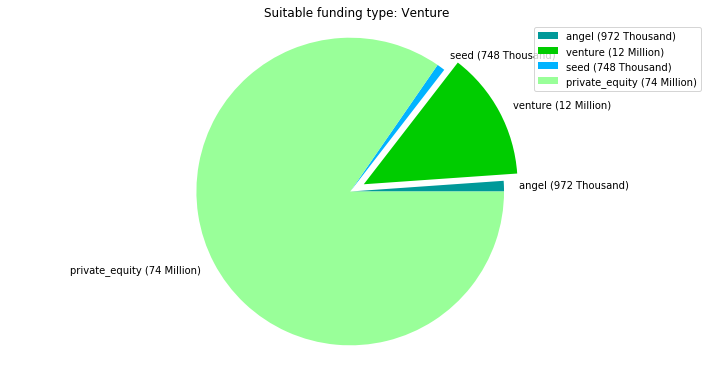

In [55]:
labels = [key + ' (' + (millify(value))+')' for (key, value)
          in funding_map.items()]
sizes = funding_map.values()
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10, 5))
colors = ['#009999', '#00cc00', '#00b3ff', '#99ff99', ]
patches, text = ax1.pie(sizes, explode=explode, colors=colors,  labels=labels)
ax1.axis('equal')
plt.legend(patches, labels, loc="best")
plt.tight_layout()
plt.title('Suitable funding type: Venture')
plt.savefig('funding_type.png',dpi=100)
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [56]:
top9['is_top'] = top9.apply(lambda x: x['country_code'] in top_countries,axis=1)
top9

,country_code,raised_amount_usd,is_top
94,USA,420068029342.0000,True
15,CHN,39338918773.0000,False
29,GBR,20072813004.0000,True
39,IND,14261508718.0000,True
12,CAN,9482217668.0000,False
28,FRA,7226851352.0000,False
42,ISR,6854350477.0000,False
21,DEU,6306921981.0000,False
45,JPN,3167647127.0000,False


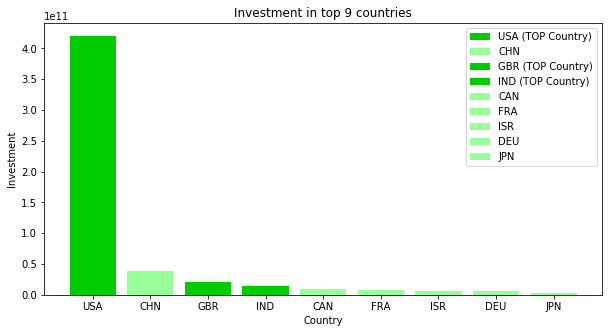

In [57]:
x = top9['country_code']
y = top9['raised_amount_usd']
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#00cc00' if row['is_top'] else '#99ff99' for index, row in top9.iterrows()]
labels = [ row['country_code'] + ' (TOP Country)' if row['is_top'] else row['country_code'] for index, row in top9.iterrows()]
patches = ax.bar(x, y, color=colors)

plt.legend(patches, labels, loc="best")

ax.set_title('Investment in top 9 countries')
ax.set_xlabel('Country')
ax.set_ylabel('Investment')
plt.savefig('top_9_investment.png',dpi=100)
plt.show()


### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [58]:
complete_top_3_investment.head(10)

,country_code,main_sector,sum,count
0,USA,Others,26330493931.0000,2951
1,USA,"Social, Finance, Analytics, Advertising",23807376964.0000,2714
2,USA,Cleantech / Semiconductors,21633430822.0000,2350
3,GBR,Others,1283624289.0000,147
4,GBR,"Social, Finance, Analytics, Advertising",1089404014.0000,133
5,GBR,Cleantech / Semiconductors,1163990056.0000,130
6,IND,Others,1013409507.0000,110
7,IND,"Social, Finance, Analytics, Advertising",550549550.0000,60
8,IND,"News, Search and Messaging",433834545.0000,52


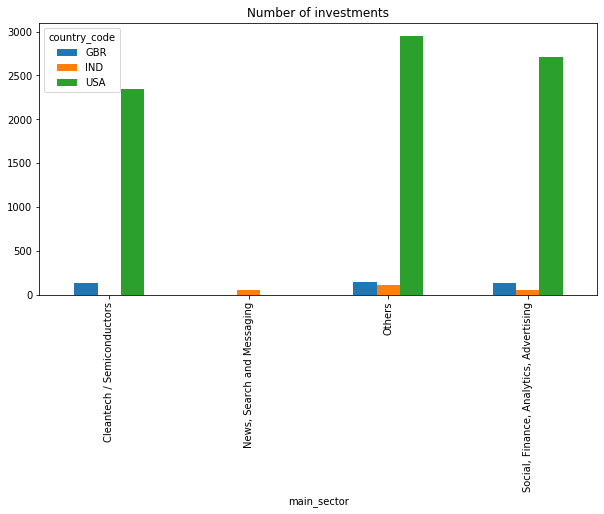

In [59]:
bar_chart=complete_top_3_investment.pivot(index='main_sector', columns='country_code', values='count').plot(
    kind='bar', title='Number of investments',figsize=(10, 5))
fig = bar_chart.get_figure()
fig.savefig("number_of_investments.png")